## Importando os Pacotes

In [152]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd


## Carregando os dados das ações

In [153]:
acoes = {
    'ITAUSA':yf.Ticker('ITSA4.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'B3':yf.Ticker('B3SA3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'BANCO DO BRASIL':yf.Ticker('BBAS3.SA'),
    'HYPERA':yf.Ticker('HYPE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'WEG':yf.Ticker('WEGE3.SA'),
    'PETROBRAS':yf.Ticker('PETR4.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA'),
    'COPEL':yf.Ticker('CPLE6.SA'),
    'MULTIPLAN':yf.Ticker('MULT3.SA'),
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'AMBEV':yf.Ticker('ABEV3.SA'),
    'ENGIE':yf.Ticker('EGIE3.SA'),
    'BRADESCO':yf.Ticker('BBDC3.SA'),
    'BTG PACTUAL':yf.Ticker('BPAC11.SA'),
    'ITAU':yf.Ticker('ITUB3.SA'),
    'EZTEC':yf.Ticker('EZTC3.SA'),
    'AREZZO':yf.Ticker('ARZZ3.SA')
}

## Organizando o DataFrame com as informações de cada ação

In [154]:
data_acoes = []
for acao in acoes:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_acoes.append(data)

## Primeira ação do portfólio é a Telefônica

In [155]:
portfolio = 0

portfolio += data_acoes[12]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações

portfolio

Date
2018-10-05 00:00:00-03:00    1000.000220
2018-10-08 00:00:00-03:00    1026.716683
2018-10-09 00:00:00-03:00     991.450761
2018-10-10 00:00:00-03:00     988.511616
2018-10-11 00:00:00-03:00     984.237291
                                ...     
2023-09-29 00:00:00-03:00    1663.007409
2023-10-02 00:00:00-03:00    1683.804665
2023-10-03 00:00:00-03:00    1684.574950
2023-10-04 00:00:00-03:00    1702.676135
2023-10-05 00:00:00-03:00    1711.534192
Name: Close, Length: 1240, dtype: float64

In [156]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária']
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária']
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.416899
VALE               0.212086
B3                 0.371881
FLEURY             0.301429
BANCO DO BRASIL    0.366532
HYPERA             0.379902
RAIA DROGASIL      0.296070
WEG                0.256771
PETROBRAS          0.296272
ALUPAR             0.372149
COPEL              0.438346
MULTIPLAN          0.412835
TELEFÔNICA         1.000000
AMBEV              0.372468
ENGIE              0.476174
BRADESCO           0.384269
BTG PACTUAL        0.345337
ITAU               0.361012
EZTEC              0.372101
AREZZO             0.312691
Name: Portfólio, dtype: float64

## Segunda ação do portfólio é a Vale, pois tinha a correlação mais próxima de zero com o portfólio

In [157]:
portfolio += data_acoes[1]['Valor por dia'] # VALE - Setor de mineração

portfolio

Date
2018-10-05 00:00:00-03:00    2000.000413
2018-10-08 00:00:00-03:00    2019.063212
2018-10-09 00:00:00-03:00    1995.103642
2018-10-10 00:00:00-03:00    1960.680855
2018-10-11 00:00:00-03:00    1966.669078
                                ...     
2023-09-29 00:00:00-03:00    3369.357025
2023-10-02 00:00:00-03:00    3375.257078
2023-10-03 00:00:00-03:00    3365.675239
2023-10-04 00:00:00-03:00    3365.849424
2023-10-05 00:00:00-03:00    3376.474927
Name: Close, Length: 1240, dtype: float64

In [158]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portfólio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária']
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.471534
VALE               0.828049
B3                 0.406202
FLEURY             0.287459
BANCO DO BRASIL    0.449183
HYPERA             0.365466
RAIA DROGASIL      0.224104
WEG                0.303306
PETROBRAS          0.472307
ALUPAR             0.352604
COPEL              0.423021
MULTIPLAN          0.391327
TELEFÔNICA         0.705841
AMBEV              0.332212
ENGIE              0.409563
BRADESCO           0.469678
BTG PACTUAL        0.401831
ITAU               0.420071
EZTEC              0.348936
AREZZO             0.330891
Name: Portfólio, dtype: float64

## Terceira ação do portfólio é a RAIA DROGASIL, pois tinha a correlação mais próxima de zero com o portfólio

In [159]:
portfolio += data_acoes[6]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias

portfolio

Date
2018-10-05 00:00:00-03:00    3000.000342
2018-10-08 00:00:00-03:00    3039.681482
2018-10-09 00:00:00-03:00    3002.388742
2018-10-10 00:00:00-03:00    2947.209889
2018-10-11 00:00:00-03:00    2894.229183
                                ...     
2023-09-29 00:00:00-03:00    5429.965752
2023-10-02 00:00:00-03:00    5417.960404
2023-10-03 00:00:00-03:00    5388.981144
2023-10-04 00:00:00-03:00    5432.426664
2023-10-05 00:00:00-03:00    5428.336971
Name: Close, Length: 1240, dtype: float64

In [160]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portfólio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária']
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária'] # 3a ação do portfólio
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.528368
VALE               0.681573
B3                 0.505767
FLEURY             0.425957
BANCO DO BRASIL    0.480783
HYPERA             0.477196
RAIA DROGASIL      0.670964
WEG                0.442584
PETROBRAS          0.481622
ALUPAR             0.435389
COPEL              0.477396
MULTIPLAN          0.488586
TELEFÔNICA         0.674092
AMBEV              0.447521
ENGIE              0.469275
BRADESCO           0.511464
BTG PACTUAL        0.460467
ITAU               0.490869
EZTEC              0.456902
AREZZO             0.451179
Name: Portfólio, dtype: float64

## Quarta ação do portfólio é a FLEURY, pois tinha a correlação mais próxima de zero com o portfólio

In [161]:
portfolio += data_acoes[3]['Valor por dia'] # FLEURY - Setor de laboratórios

portfolio

Date
2018-10-05 00:00:00-03:00    4000.000342
2018-10-08 00:00:00-03:00    4077.965455
2018-10-09 00:00:00-03:00    4042.517953
2018-10-10 00:00:00-03:00    3948.593561
2018-10-11 00:00:00-03:00    3890.539050
                                ...     
2023-09-29 00:00:00-03:00    6335.871755
2023-10-02 00:00:00-03:00    6354.362268
2023-10-03 00:00:00-03:00    6345.713580
2023-10-04 00:00:00-03:00    6380.189757
2023-10-05 00:00:00-03:00    6363.542948
Name: Close, Length: 1240, dtype: float64

In [162]:
df_corr = pd.DataFrame()
df_corr['Portfólio'] = portfolio.ffill(axis=0).pct_change() # Rentabilidade diária do portfólio
df_corr['ITAUSA'] = data_acoes[0]['Rentabilidade diária']
df_corr['VALE'] = data_acoes[1]['Rentabilidade diária'] # 2a ação do portfólio
df_corr['B3'] = data_acoes[2]['Rentabilidade diária']
df_corr['FLEURY'] = data_acoes[3]['Rentabilidade diária'] # 4a ação do portfólio
df_corr['BANCO DO BRASIL'] = data_acoes[4]['Rentabilidade diária']
df_corr['HYPERA'] = data_acoes[5]['Rentabilidade diária']
df_corr['RAIA DROGASIL'] = data_acoes[6]['Rentabilidade diária'] # 3a ação do portfólio
df_corr['WEG'] = data_acoes[7]['Rentabilidade diária']
df_corr['PETROBRAS'] = data_acoes[8]['Rentabilidade diária']
df_corr['ALUPAR'] = data_acoes[9]['Rentabilidade diária']
df_corr['COPEL'] = data_acoes[10]['Rentabilidade diária']
df_corr['MULTIPLAN'] = data_acoes[11]['Rentabilidade diária']
df_corr['TELEFÔNICA'] = data_acoes[12]['Rentabilidade diária'] # 1a ação do portfólio
df_corr['AMBEV'] = data_acoes[13]['Rentabilidade diária']
df_corr['ENGIE'] = data_acoes[14]['Rentabilidade diária']
df_corr['BRADESCO'] = data_acoes[15]['Rentabilidade diária']
df_corr['BTG PACTUAL'] = data_acoes[16]['Rentabilidade diária']
df_corr['ITAU'] = data_acoes[17]['Rentabilidade diária']
df_corr['EZTEC'] = data_acoes[18]['Rentabilidade diária']
df_corr['AREZZO'] = data_acoes[19]['Rentabilidade diária']

df_corr.corr().iloc[0] # Correlação do portfólio com as outras ações

Portfólio          1.000000
ITAUSA             0.577426
VALE               0.626204
B3                 0.573708
FLEURY             0.667005
BANCO DO BRASIL    0.543049
HYPERA             0.536449
RAIA DROGASIL      0.681309
WEG                0.499471
PETROBRAS          0.520386
ALUPAR             0.477820
COPEL              0.527858
MULTIPLAN          0.563506
TELEFÔNICA         0.642311
AMBEV              0.493162
ENGIE              0.521444
BRADESCO           0.565628
BTG PACTUAL        0.522555
ITAU               0.540679
EZTEC              0.532636
AREZZO             0.524820
Name: Portfólio, dtype: float64

## Quinta ação do portfólio é a ALUPAR, pois tinha a correlação mais próxima de zero com o portfólio

In [163]:
portfolio += data_acoes[9]['Valor por dia'] # ALUPAR - Setor de energia

portfolio

Date
2018-10-05 00:00:00-03:00    5000.000416
2018-10-08 00:00:00-03:00    5079.818384
2018-10-09 00:00:00-03:00    5048.694556
2018-10-10 00:00:00-03:00    4941.181548
2018-10-11 00:00:00-03:00    4867.067827
                                ...     
2023-09-29 00:00:00-03:00    8590.687615
2023-10-02 00:00:00-03:00    8580.169653
2023-10-03 00:00:00-03:00    8554.272776
2023-10-04 00:00:00-03:00    8626.381448
2023-10-05 00:00:00-03:00    8596.406445
Name: Close, Length: 1240, dtype: float64

## Organizando DataFrame do portfólio

In [164]:
acoes_portfolio ={
    'TELEFÔNICA':yf.Ticker('VIVT3.SA'),
    'VALE':yf.Ticker('VALE3.SA'),
    'RAIA DROGASIL':yf.Ticker('RADL3.SA'),
    'FLEURY':yf.Ticker('FLRY3.SA'),
    'ALUPAR':yf.Ticker('ALUP11.SA')
    }


In [165]:
data_portfolio = []
for acao in acoes_portfolio:
    data = {}
    data['Ação'] = acao
    data['Valor investido'] = 1000
    data['Quantidade'] = data['Valor investido'] / acoes[acao].history(period='5y').iloc[0]['Close']
    data['Valor final'] = data['Quantidade'] * acoes[acao].history(period='5y').iloc[-1]['Close']
    data['Rentabilidade geral'] = (data['Valor final'] / data['Valor investido'] - 1)
    data['Valor por dia'] = data['Quantidade'] * acoes[acao].history(period='5y')['Close']
    data['Rentabilidade diária'] = data['Valor por dia'].ffill(axis=0).pct_change()
    data['Desvio padrão diário'] = data['Rentabilidade diária'].std()
    data['Índice Sharpee'] = data['Rentabilidade geral'] / data['Desvio padrão diário']
    data_portfolio.append(data)


In [166]:
portfolio = 0
for i in range(len(data_portfolio)):
    portfolio += data_portfolio[i]['Valor por dia']
portfolio

Date
2018-10-05 00:00:00-03:00    4999.999811
2018-10-08 00:00:00-03:00    5079.818488
2018-10-09 00:00:00-03:00    5048.694450
2018-10-10 00:00:00-03:00    4941.181576
2018-10-11 00:00:00-03:00    4867.067903
                                ...     
2023-09-29 00:00:00-03:00    8590.687525
2023-10-02 00:00:00-03:00    8580.169556
2023-10-03 00:00:00-03:00    8554.272675
2023-10-04 00:00:00-03:00    8626.381355
2023-10-05 00:00:00-03:00    8595.977625
Name: Close, Length: 1240, dtype: float64

## Visualizando retornos do portfólio e das ações ao longo do período de 5 anos

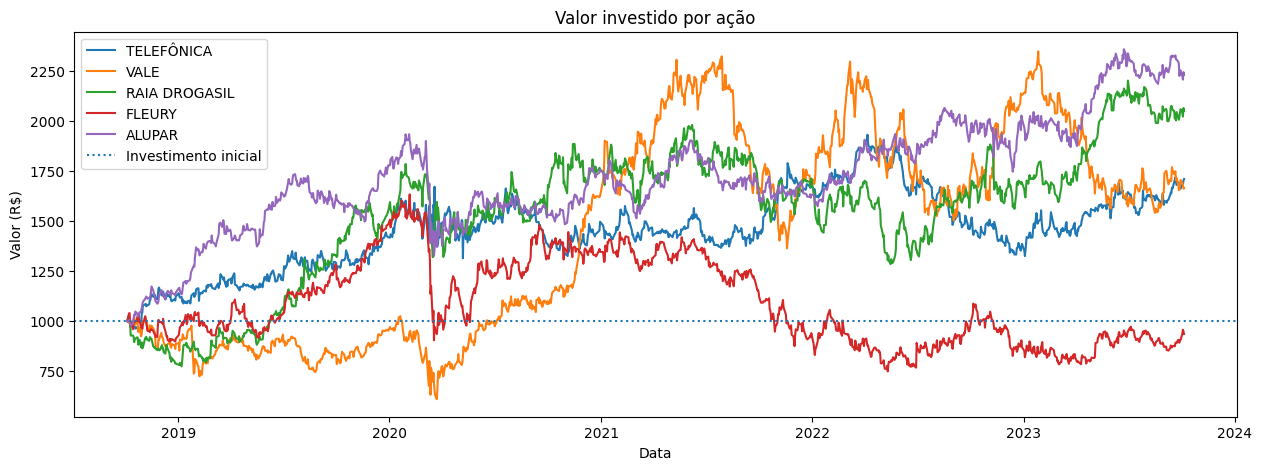

In [167]:
plt.figure(figsize=(15,5))
for i in range(len(data_portfolio)):
    plt.plot(data_portfolio[i]['Valor por dia'], label=data_portfolio[i]['Ação'])
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido por ação')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

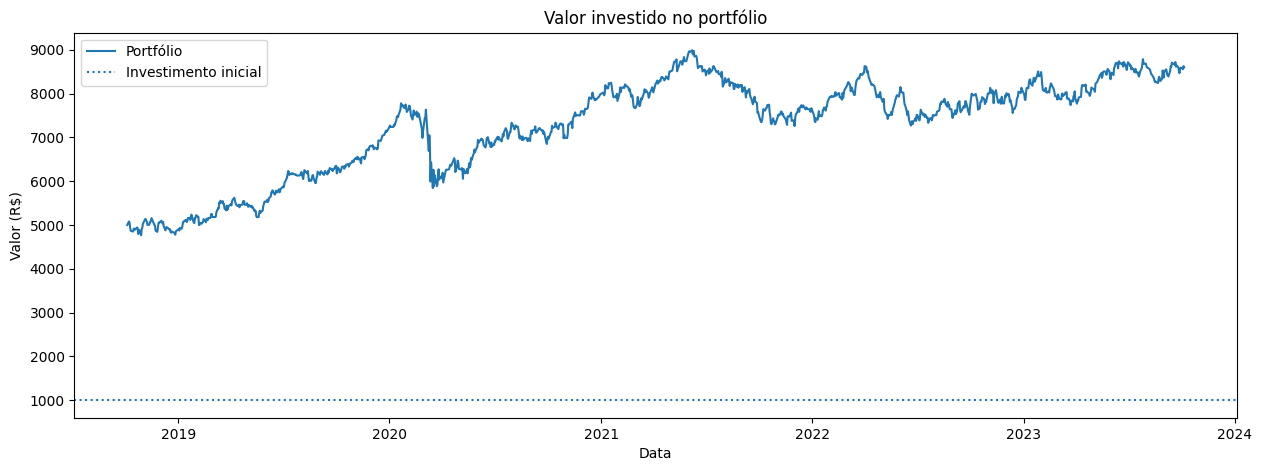

In [168]:
plt.figure(figsize=(15,5))
plt.plot(portfolio, label='Portfólio')
plt.axhline(data['Valor investido'], linestyle=':', label='Investimento inicial')
plt.title('Valor investido no portfólio')
plt.ylabel('Valor (R\$)')
plt.xlabel('Data')
plt.legend()
plt.show()

## Visualizando variação diária das ações do portfólio

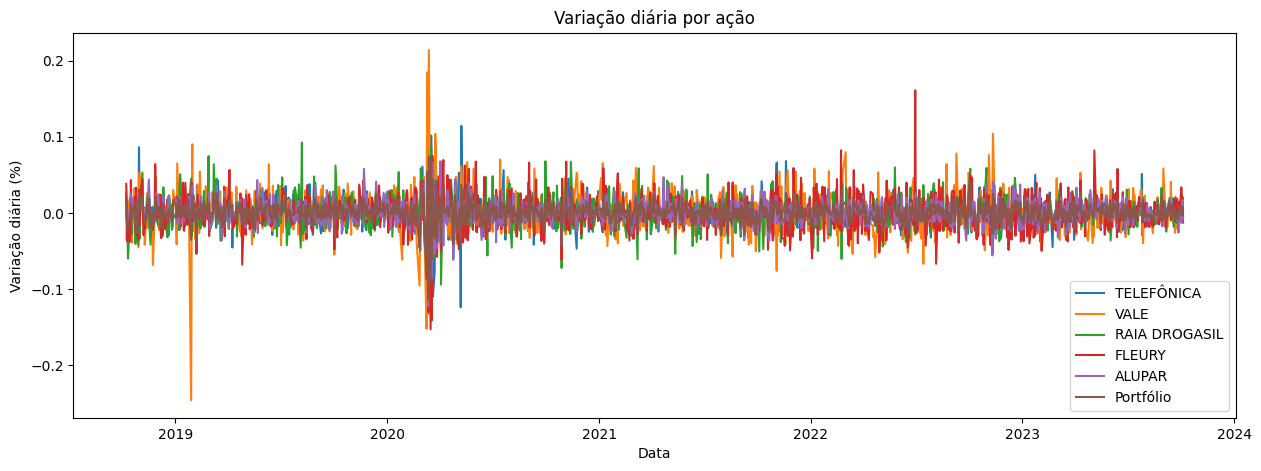

In [169]:
plt.figure(figsize=(15,5))
for i in range(len(data_portfolio)):
    plt.plot(data_portfolio[i]['Rentabilidade diária'], label=data_portfolio[i]['Ação'])
plt.plot(portfolio.ffill(axis=0).pct_change(), label='Portfólio')
plt.title('Variação diária por ação')
plt.ylabel('Variação diária (%)')
plt.xlabel('Data')
plt.legend()
plt.show()

## Visualizando informações sobre as ações individuais e sobre o portfólio

In [170]:
for acao in data_portfolio:
    print(acao['Ação'])
    print('Valor investido: R$ {:.2f}'.format(acao['Valor investido']))
    print('Valor final: R$ {:.2f}'.format(acao['Valor final']))
    print('Rentabilidade geral: {:.2f}%'.format(acao['Rentabilidade geral'] * 100))
    print('Índice Sharpee: {:.2f}'.format(acao['Índice Sharpee']))
    print('')
print('Portfólio')
print('Valor investido: R$ {:.2f}'.format(1000 * len(data_portfolio)))
print('Valor final: R$ {:.2f}'.format(portfolio.iloc[-1]))
print('Rentabilidade geral: {:.2f}%'.format((portfolio.iloc[-1] / (1000 * len(data_portfolio)) - 1) * 100)) 
print('Índice Sharpee: {:.2f}'.format((portfolio.iloc[-1] / (1000 * len(data_portfolio)) - 1) / portfolio.ffill(axis=0).pct_change().std()))


TELEFÔNICA
Valor investido: R$ 1000.00
Valor final: R$ 1711.53
Rentabilidade geral: 71.15%
Índice Sharpee: 41.04

VALE
Valor investido: R$ 1000.00
Valor final: R$ 1665.45
Rentabilidade geral: 66.54%
Índice Sharpee: 25.98

RAIA DROGASIL
Valor investido: R$ 1000.00
Valor final: R$ 2051.11
Rentabilidade geral: 105.11%
Índice Sharpee: 51.85

FLEURY
Valor investido: R$ 1000.00
Valor final: R$ 935.21
Rentabilidade geral: -6.48%
Índice Sharpee: -2.92

ALUPAR
Valor investido: R$ 1000.00
Valor final: R$ 2232.08
Rentabilidade geral: 123.21%
Índice Sharpee: 79.77

Portfólio
Valor investido: R$ 5000.00
Valor final: R$ 8595.98
Rentabilidade geral: 71.92%
Índice Sharpee: 56.92


## Calculando valores do portfólio ao adicionar mais ações

In [171]:
portfolio = 0
portfolio += data_portfolio[0]['Valor por dia'] # TELEFÔNICA - Setor de telecomunicações
ind_sharpee_1_acao = (portfolio.iloc[-1] / (1000 * 1) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 1 ação: {:.2f}'.format(ind_sharpee_1_acao))

media_ind_sharpee_1_acao = 0
for i in range(1):
    media_ind_sharpee_1_acao += data_portfolio[i]['Índice Sharpee']

Índice Sharpee do Portfólio com 1 ação: 41.04


In [172]:
portfolio += data_portfolio[1]['Valor por dia'] # VALE - Setor de mineração
ind_sharpee_2_acoes = (portfolio.iloc[-1] / (1000 * 2) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 2 ações: {:.2f}'.format(ind_sharpee_2_acoes))

media_ind_sharpee_2_acoes = 0
for i in range(2):
    media_ind_sharpee_2_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_2_acoes /= 2

Índice Sharpee do Portfólio com 2 ações: 41.37


In [173]:
portfolio += data_portfolio[2]['Valor por dia'] # RAIA DROGASIL - Setor de farmácias
ind_sharpee_3_acoes = (portfolio.iloc[-1] / (1000 * 3) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 3 ações: {:.2f}'.format(ind_sharpee_3_acoes))

media_ind_sharpee_3_acoes = 0
for i in range(3):
    media_ind_sharpee_3_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_3_acoes /= 3

Índice Sharpee do Portfólio com 3 ações: 57.28


In [174]:
portfolio += data_portfolio[3]['Valor por dia'] # FLEURY - Setor de laboratórios
ind_sharpee_4_acoes = (portfolio.iloc[-1] / (1000 * 4) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 4 ações: {:.2f}'.format(ind_sharpee_4_acoes))

media_ind_sharpee_4_acoes = 0
for i in range(4):
    media_ind_sharpee_4_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_4_acoes /= 4

Índice Sharpee do Portfólio com 4 ações: 43.07


In [175]:
portfolio += data_portfolio[4]['Valor por dia'] # WEG - Setor de equipamentos eletrônicos
ind_sharpee_5_acoes = (portfolio.iloc[-1] / (1000 * 5) - 1) / portfolio.ffill(axis=0).pct_change().std()
print('Índice Sharpee do Portfólio com 5 ações: {:.2f}'.format(ind_sharpee_5_acoes))

media_ind_sharpee_5_acoes = 0
for i in range(5):
    media_ind_sharpee_5_acoes += data_portfolio[i]['Índice Sharpee']
media_ind_sharpee_5_acoes /= 5

Índice Sharpee do Portfólio com 5 ações: 56.92


## Visualizando Índice Sharpee do portfólio ao adicionar mais ações

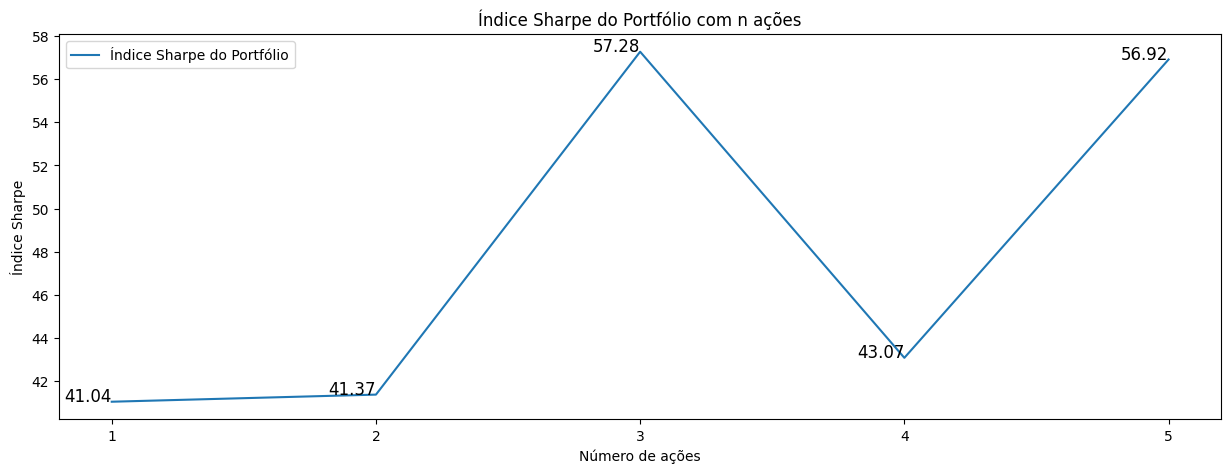

In [187]:
plt.figure(figsize=(15,5))
n_acoes = ['1','2','3','4','5']
n_valores_sharpe = [ind_sharpee_1_acao, ind_sharpee_2_acoes, ind_sharpee_3_acoes, ind_sharpee_4_acoes, ind_sharpee_5_acoes]
plt.plot(n_acoes, n_valores_sharpe, label='Índice Sharpe do Portfólio')
for i, j in zip(n_acoes, n_valores_sharpe):
    plt.text(i, j, f'{j:.2f}', fontsize=12, ha='right', )
plt.legend()
plt.title('Índice Sharpe do Portfólio com n ações')
plt.ylabel('Índice Sharpe')
plt.xlabel('Número de ações')
plt.show()

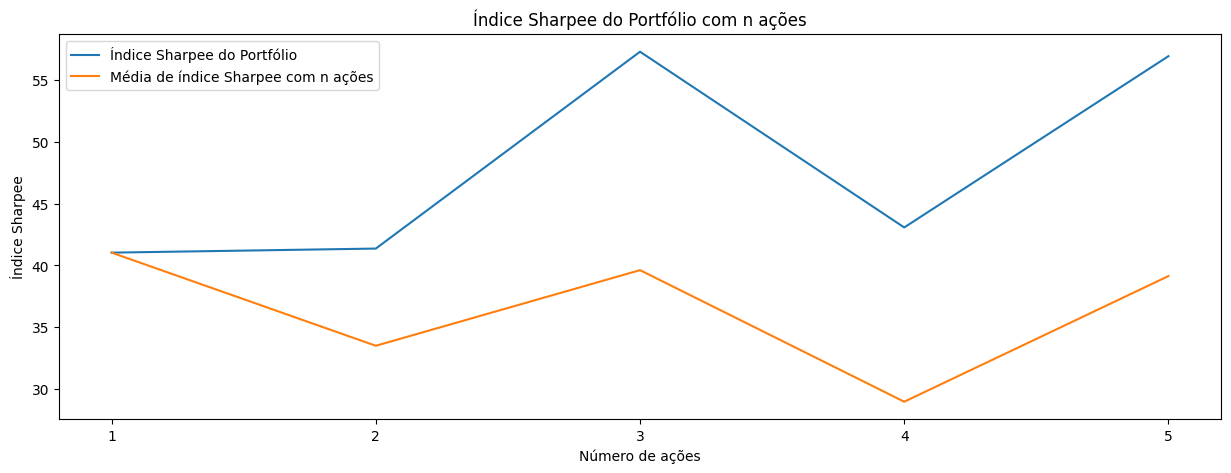

In [189]:
plt.figure(figsize=(15,5))
n_medias_sharpe = [media_ind_sharpee_1_acao, media_ind_sharpee_2_acoes, media_ind_sharpee_3_acoes, media_ind_sharpee_4_acoes, media_ind_sharpee_5_acoes]
plt.plot(n_acoes, n_valores_sharpe, label='Índice Sharpee do Portfólio')
plt.plot(n_acoes, n_medias_sharpe, label='Média de índice Sharpee com n ações')
plt.legend()
plt.title('Índice Sharpee do Portfólio com n ações')
plt.ylabel('Índice Sharpee')
plt.xlabel('Número de ações')
plt.show()

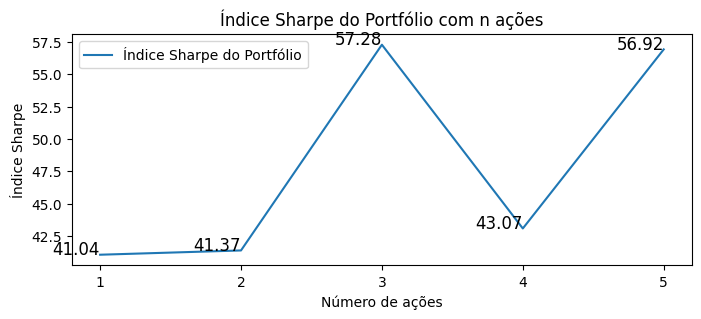

In [7]:
plt.figure(figsize=(8,3))
n_acoes = ['1','2','3','4','5']
n_valores_sharpe = [41.04, 41.37, 57.28, 43.07, 56.92]
plt.plot(n_acoes, n_valores_sharpe, label='Índice Sharpe do Portfólio')
for i, j in zip(n_acoes, n_valores_sharpe):
    plt.text(i, j, f'{j:.2f}', fontsize=12, ha='right', )
plt.legend()
plt.title('Índice Sharpe do Portfólio com n ações')
plt.ylabel('Índice Sharpe')
plt.xlabel('Número de ações')
plt.show()